In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
df = pd.read_csv('wallmart.csv')
df                 

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969
...,...,...,...,...,...,...,...,...,...,...
550063,1006033,P00372445,M,51-55,13,B,1,1,20,368
550064,1006035,P00375436,F,26-35,1,C,3,0,20,371
550065,1006036,P00375436,F,26-35,15,B,4+,1,20,137
550066,1006038,P00375436,F,55+,1,C,2,0,20,365


In [4]:
df['Purchase'].mean(), df['Purchase'].median(), df['Purchase'].mean() - df['Purchase'].median()

(9263.968712959126, 8047.0, 1216.9687129591257)

Counts of Columns

In [3]:
df['Product_Category'].nunique()

20

In [4]:
df['Product_ID'].nunique()

3631

In [5]:
df['User_ID'].nunique()

5891

5023.065393820582

BoxPlots based on Purchase Amount

<Axes: xlabel='Gender', ylabel='Purchase'>

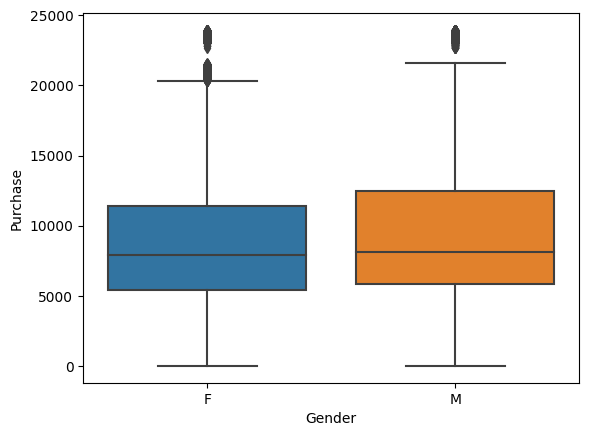

In [6]:
sns.boxplot(x='Gender', y='Purchase', data=df)

<Axes: xlabel='Age', ylabel='Purchase'>

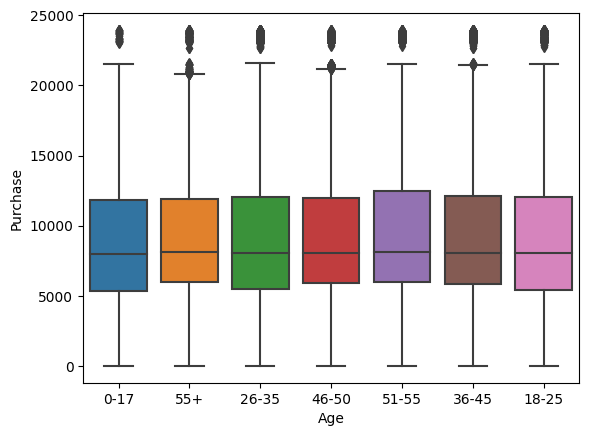

In [7]:
sns.boxplot(x='Age', y='Purchase', data=df)

<Axes: xlabel='Marital_Status', ylabel='Purchase'>

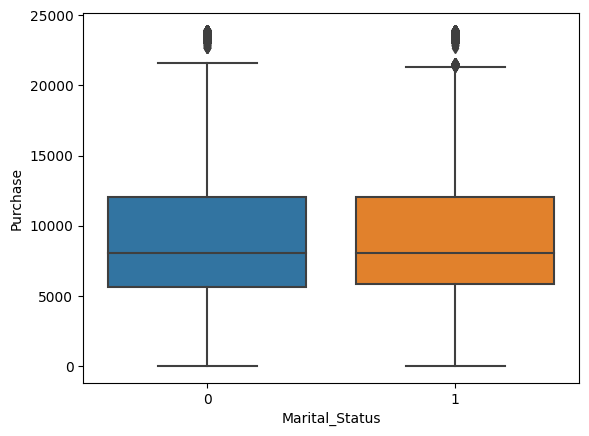

In [8]:
sns.boxplot(x='Marital_Status', y='Purchase', data=df)

<Axes: xlabel='City_Category', ylabel='Purchase'>

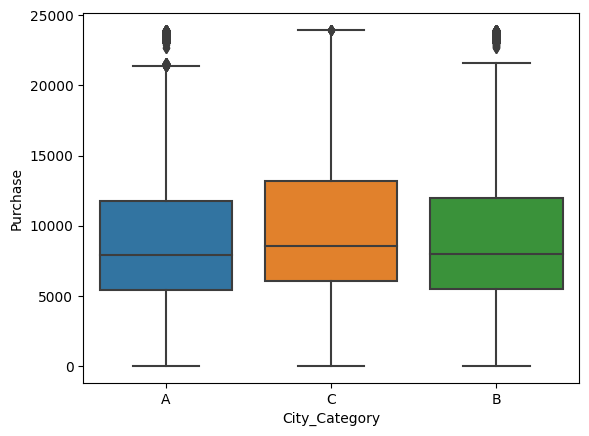

In [9]:
sns.boxplot(x='City_Category', y='Purchase', data=df)

Null Values

In [63]:
df.isna().sum()

User_ID                       0
Product_ID                    0
Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category              0
Purchase                      0
dtype: int64

In [68]:
req_columns = df.columns[2:-1]
100*df[req_columns].melt().groupby(['variable', 'value'])[['value']].count()/len(df)

value
variable                   value           
Age                        0-17    2.745479
                           18-25  18.117760
                           26-35  39.919974
                           36-45  19.999891
                           46-50   8.308246
                           51-55   6.999316
                           55+     3.909335
City_Category              A      26.854862
                           B      42.026259
                           C      31.118880
Gender                     F      24.689493
                           M      75.310507
Marital_Status             0      59.034701
                           1      40.965299
Occupation                 0      12.659889
                           1       8.621843
                           2       4.833584
                           3       3.208694
                           4      13.145284
                           5       2.213726
                           6       3.700452
                           7      10.750125
                           8       0.281056
                           9       1.143677
                           10      2.350618
                           11      2.106285
                           12      5.668208
                           13      1.404917
                           14      4.964659
                           15      2.211545
                           16      4.612339
                           17      7.279645
                           18      1.203851
                           19      1.538173
                           20      6.101427
Product_Category           1      25.520118
                           2       4.338373
                           3       3.674637
                           4       2.136645
                           5      27.438971
                           6       3.720631
                           7       0.676462
                           8      20.711076
                           9       0.074536
                           10      0.931703
                           11      4.415272
                           12      0.717548
                           13      1.008784
                           14      0.276875
                           15      1.143495
                           16      1.786688
                           17      0.105078
                           18      0.568112
                           19      0.291419
                           20      0.463579
Stay_In_Current_City_Years 0      13.525237
                           1      35.235825
                           2      18.513711
                           3      17.322404
                           4+     15.402823

Observations
Highest Share
1. 26 - 35 age group.
2. B cities.
3. Un Married.
4 Product Category 1 
5. Stay_In_Current_City_Years with 1.
6. 75% are Males.

In [71]:
100*df.groupby('Gender')[['Purchase']].sum()/df['Purchase'].sum()

,Purchase
Gender,
F,23.278576
M,76.721424


Observations
•	Male purchasing power is also significant with 76%. 

In [73]:
round(100*df.groupby('Age')[['Purchase']].sum()/df['Purchase'].sum(),2)

,Purchase
Age,
0-17,2.65
18-25,17.93
26-35,39.87
36-45,20.15
46-50,8.26
51-55,7.20
55+,3.94


In [77]:
round(100*df.groupby('Occupation')[['Purchase']].sum()/df['Purchase'].sum(),2)

,Purchase
Occupation,
0,12.47
1,8.33
2,4.67
3,3.18
4,13.07
5,2.23
6,3.70
7,10.94
8,0.29


In [78]:
round(100*df.groupby('Stay_In_Current_City_Years')[['Purchase']].sum()/df['Purchase'].sum(),2)

,Purchase
Stay_In_Current_City_Years,
0,13.40
1,35.18
2,18.63
3,17.37
4+,15.42


Avg Purchase by Gender

In [10]:
df[df['Gender'] == 'M']['Purchase'].mean(), df[df['Gender'] == 'F']['Purchase'].mean().__round__(2)

(9437.526040472265, 8734.57)

In [ ]:
for i in req_columns:
    x = []
    cats = df[i].unique()
    for j in cats:
        x.append((df[df[i]==j]['Purchase'].mean().__round__(2)))
    print(cats)
    print(x)


Bar Charts to find spread

In [22]:
req_columns

Index(['Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category'],
      dtype='object')

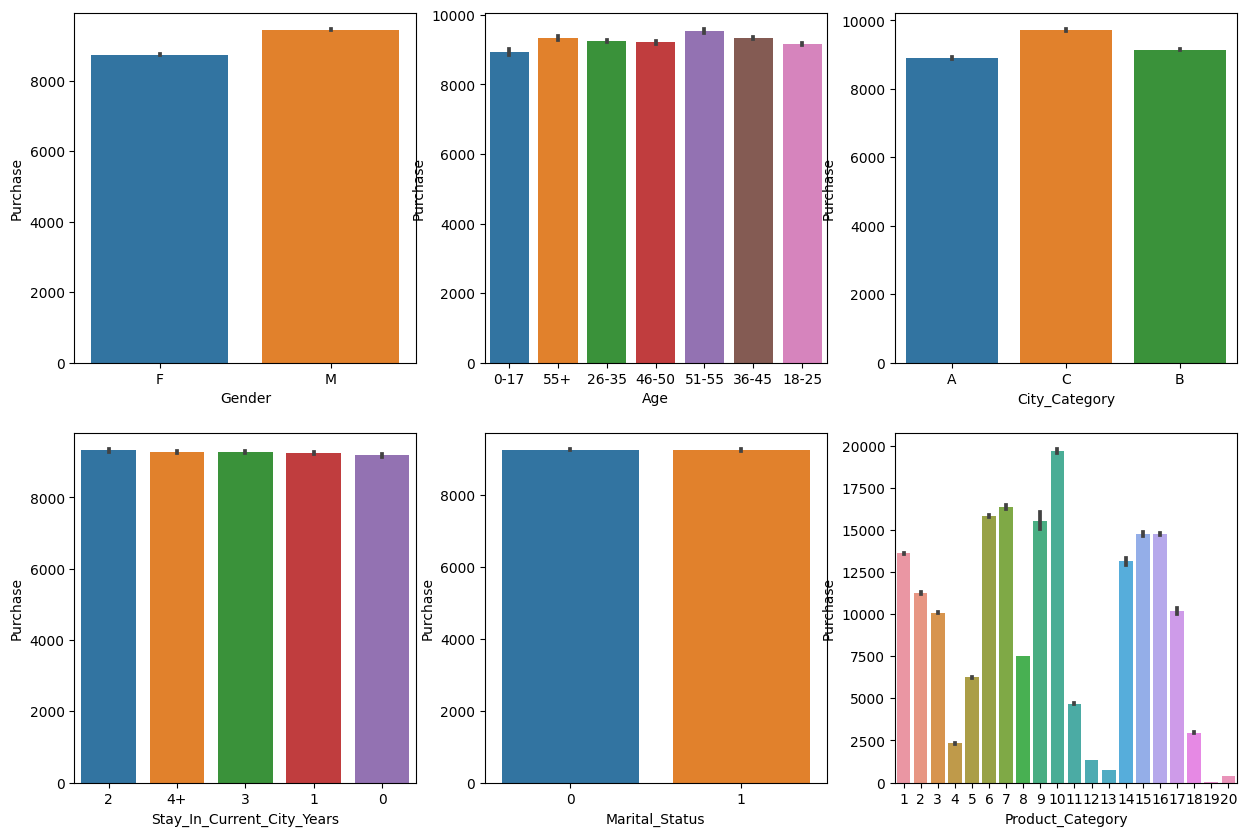

In [23]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
sns.barplot(x='Gender', y='Purchase', data=df, ax=axs[0,0])
sns.barplot(x='Age', y='Purchase', data=df, ax=axs[0,1])
sns.barplot(x='City_Category', y='Purchase', data=df, ax=axs[0,2])
sns.barplot(x='Stay_In_Current_City_Years', y='Purchase', data=df, ax=axs[1,0])
sns.barplot(x='Marital_Status', y='Purchase', data=df, ax=axs[1,1])
sns.barplot(x='Product_Category', y='Purchase', data=df, ax=axs[1,2])
plt.show()

Heatmaps

<Axes: xlabel='None-Marital_Status', ylabel='Gender'>

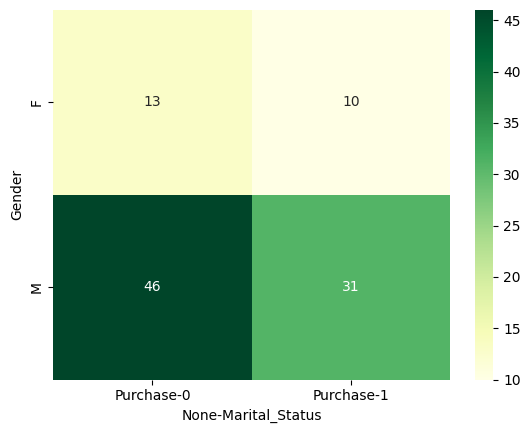

In [98]:
sns.heatmap(round(100*df.groupby(['Gender','Marital_Status'])[['Purchase']].sum()/df['Purchase'].sum()).unstack(),annot=True,cmap='YlGn', fmt='g', cbar=True)

<Axes: xlabel='None-City_Category', ylabel='Gender'>

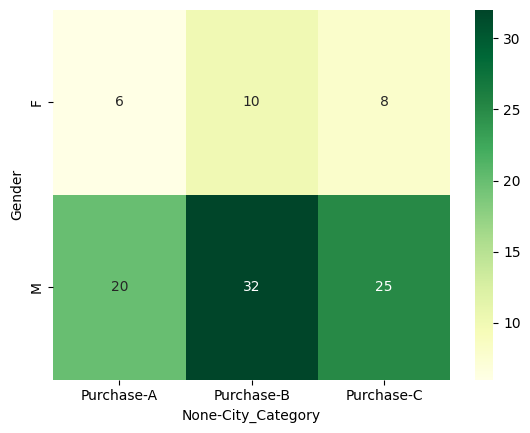

In [99]:
sns.heatmap(round(100*df.groupby(['Gender','City_Category'])[['Purchase']].sum()/df['Purchase'].sum()).unstack(),annot=True,cmap='YlGn', fmt='g', cbar=True)

Sample Test

In [4]:
purchase = df["Purchase"]
samples = [5,10,25,50,75,100,150,250,500]

Text(0.5, 1.0, 'Actual')

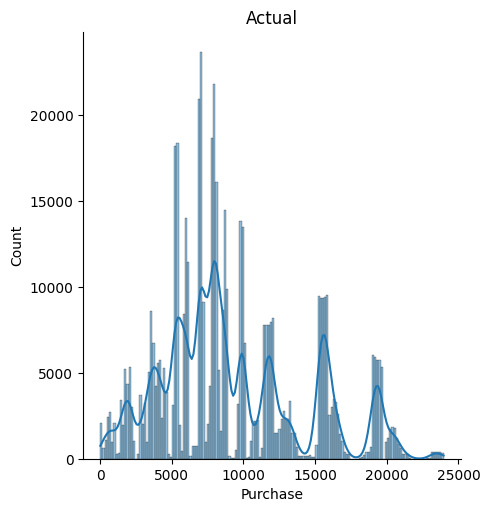

In [54]:
sns.displot(purchase, kde=True)
plt.title('Actual')

0
1
2
3
4
5
6
7
8


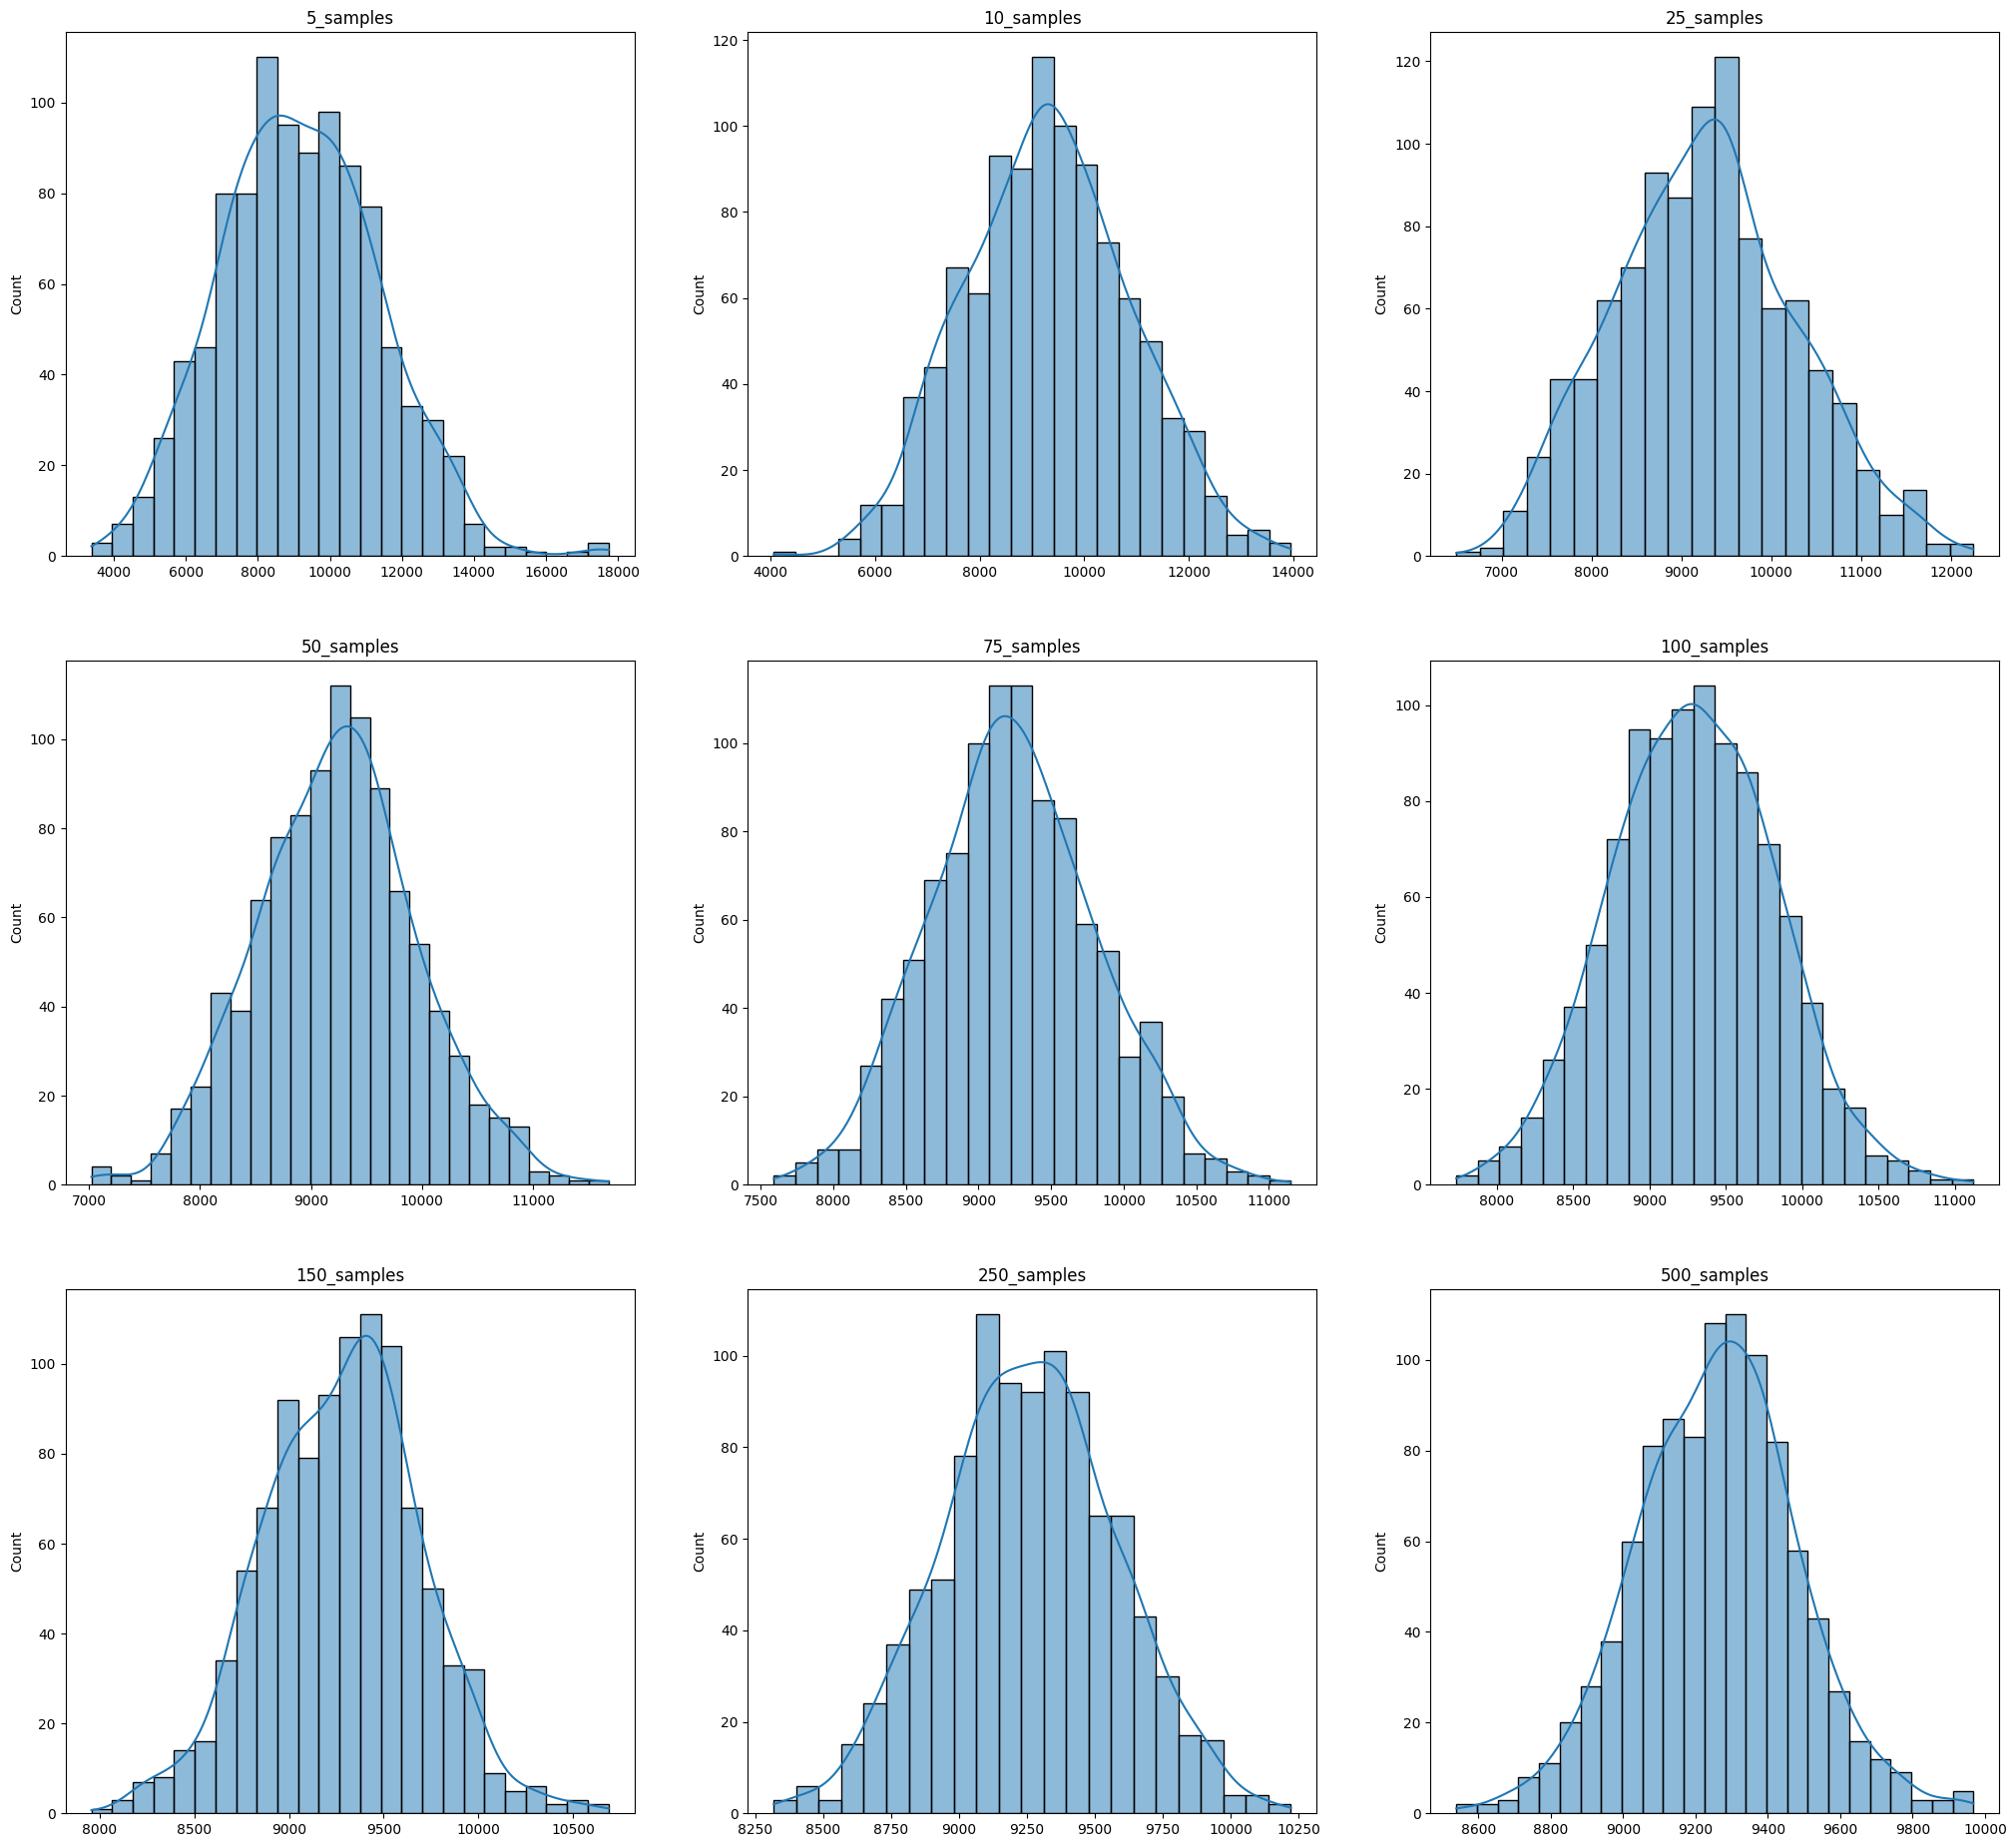

In [53]:
fig, axis = plt.subplots(nrows=3, ncols=3, figsize=(25, 15))
fig.subplots_adjust(top=1.3)
count = 0
for row in range(3):
    for column in range(3):
        sns.histplot(np.array([np.mean(purchase.sample(samples[count])) for _ in range(1000)]), kde=True, ax = axis[row, column])
        axis[row,column].set_title(f'{samples[count]}_samples')
        print(count)
        count+=1
plt.show()

Spread of the curve decreases with increasing Samples.

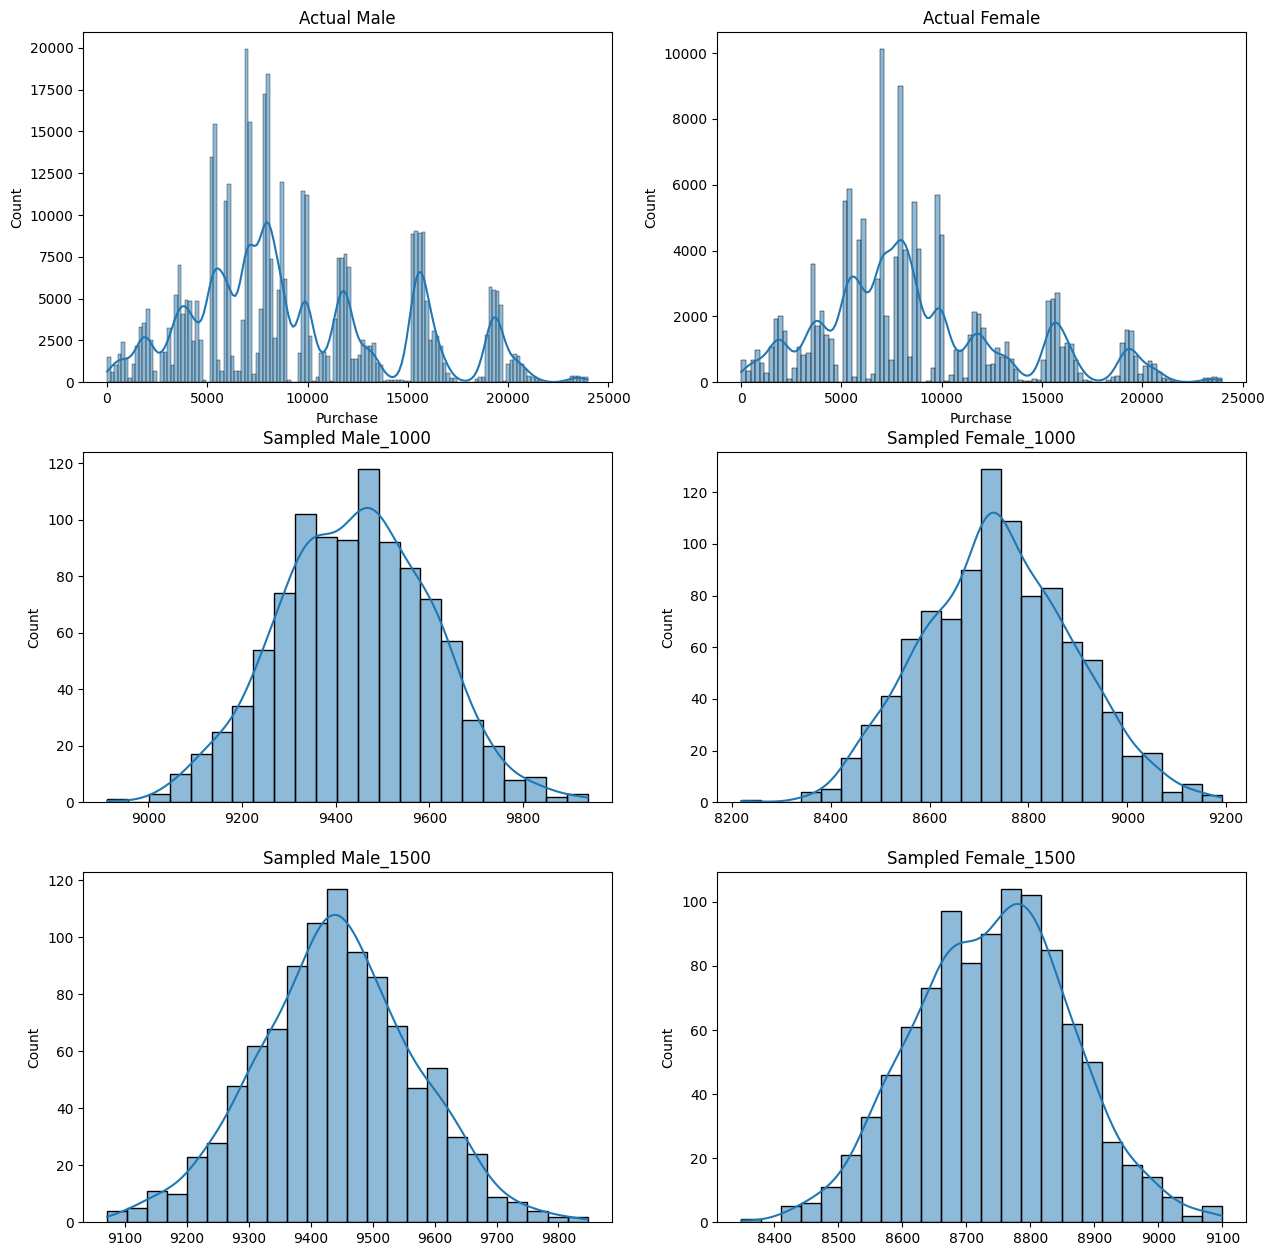

In [5]:
#Male & Female Actual, 1000 sampled & 1500 sampled.

Male = df[df['Gender'] == 'M']['Purchase']
Female = df[df['Gender'] == 'F']['Purchase']

fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15, 10))
fig.subplots_adjust(top=1.3)

sns.histplot(Male, kde=True, ax=axis[0,0])
axis[0,0].set_title('Actual Male')

sns.histplot(Female, kde=True, ax=axis[0,1])
axis[0,1].set_title('Actual Female')

male_sampled = np.array([np.mean(Male.sample(1000)) for _ in range(1000)])
sns.histplot(male_sampled, kde=True, ax=axis[1,0])
axis[1,0].set_title('Sampled Male_1000')

female_sampled = np.array([np.mean(Female.sample(1000)) for _ in range(1000)])
sns.histplot(female_sampled, kde=True, ax=axis[1,1])
axis[1,1].set_title('Sampled Female_1000')

male_sampled = np.array([np.mean(Male.sample(1500)) for _ in range(1000)])
sns.histplot(male_sampled, kde=True, ax=axis[2,0])
axis[2,0].set_title('Sampled Male_1500')

female_sampled = np.array([np.mean(Female.sample(1500)) for _ in range(1000)])
sns.histplot(female_sampled, kde=True, ax=axis[2,1])
axis[2,1].set_title('Sampled Female_1500')

plt.show()

In [5]:
# Fuction to find limits

def interval(avg,z,err):
    z = z/2
    higher = avg + z*err
    lower = avg - z*err
    return round(lower,2), round(higher,2)

In [ ]:
sample = 1000

Male = df[df['Gender'] == 'M']['Purchase']
Female = df[df['Gender'] == 'F']['Purchase']

male_sampled = np.array([np.mean(Male.sample(sample)) for _ in range(1000)])
female_sampled = np.array([np.mean(Female.sample(sample)) for _ in range(1000)])

m_mean = male_sampled.mean()
f_mean = female_sampled.mean()

print(m_mean, f_mean)

m_std = Male.std()
f_std = Female.std()
print(m_std, f_std)

m_std_err = m_std/(sample**0.5)
f_std_err = f_std/(sample**0.5)

print(m_std_err, f_std_err)

z90 = norm.ppf(0.90)
z95 = norm.ppf(0.95)
z99 = norm.ppf(0.997)



In [11]:
#For male with 1000 samples

print(f'for 90 % Confidence interval with 1000 samples are {interval(m_mean, z90, m_std_err)}')
print(f'for 95 % Confidence interval with 1000 samples are {interval(m_mean, z95, m_std_err)}')
print(f'for 99 % Confidence interval with 1000 samples are {interval(m_mean, z99, m_std_err)}')

for 90 % Confidence interval with 1000 samples are (9333.58, 9539.95)
for 95 % Confidence interval with 1000 samples are (9304.33, 9569.2)
for 99 % Confidence interval with 1000 samples are (9215.53, 9658.0)


In [12]:
#For female with 1000 samples

print(f'for 90 % Confidence interval with 1000 samples are {interval(f_mean, z90, f_std_err)}')
print(f'for 95 % Confidence interval with 1000 samples are {interval(f_mean, z95, f_std_err)}')
print(f'for 99 % Confidence interval with 1000 samples are {interval(f_mean, z99, f_std_err)}')

for 90 % Confidence interval with 1000 samples are (8633.83, 8827.03)
for 95 % Confidence interval with 1000 samples are (8606.45, 8854.41)
for 99 % Confidence interval with 1000 samples are (8523.31, 8937.55)


In [9]:
#For male with 1500 samples

print(f'for 90 % Confidence interval with 1500 samples are {interval(m_mean, z90, m_std_err)}')
print(f'for 95 % Confidence interval with 1500 samples are {interval(m_mean, z95, m_std_err)}')
print(f'for 99 % Confidence interval with 1500 samples are {interval(m_mean, z99, m_std_err)}')

for 90 % Confidence interval with 1500 samples are (9350.26, 9518.76)
for 95 % Confidence interval with 1500 samples are (9326.38, 9542.64)
for 99 % Confidence interval with 1500 samples are (9253.87, 9615.15)


In [8]:
#For female with 1500 samples

print(f'for 90 % Confidence interval with 1500 samples are {interval(f_mean, z90, f_std_err)}')
print(f'for 95 % Confidence interval with 1500 samples are {interval(f_mean, z95, f_std_err)}')
print(f'for 99 % Confidence interval with 1500 samples are {interval(f_mean, z99, f_std_err)}')

for 90 % Confidence interval with 1500 samples are (8655.97, 8813.72)
for 95 % Confidence interval with 1500 samples are (8633.61, 8836.08)
for 99 % Confidence interval with 1500 samples are (8565.73, 8903.95)


Marital Status CLT

In [6]:
UnMarried = df[df['Marital_Status'] == 0]['Purchase']
Married = df[df['Marital_Status'] == 1]['Purchase']

sample = 1000

sampled_MMean = np.mean(np.array([np.mean(Married.sample(sample)) for _ in range(1000)]))
sampled_UMean = np.mean(np.array([np.mean(UnMarried.sample(sample)) for _ in range(1000)]))



MSTD = Married.std()
USTD = UnMarried.std()


M_err = MSTD/np.sqrt(sample)
U_err = USTD/np.sqrt(sample)

z90 = norm.ppf(0.90)
z95 = norm.ppf(0.95)
z99 = norm.ppf(0.997)

In [8]:
print(f'for 90 % Confidence interval with 1000 samples are {interval(sampled_MMean, z90, M_err)}')
print(f'for 95 % Confidence interval with 1000 samples are {interval(sampled_MMean, z95, M_err)}')
print(f'for 99 % Confidence interval with 1000 samples are {interval(sampled_MMean, z99, M_err)}')

for 90 % Confidence interval with 1000 samples are (9174.69, 9378.01)
for 95 % Confidence interval with 1000 samples are (9145.87, 9406.83)
for 99 % Confidence interval with 1000 samples are (9058.38, 9494.31)


In [9]:
print(f'for 90 % Confidence interval with 1000 samples are {interval(sampled_UMean, z90, U_err)}')
print(f'for 95 % Confidence interval with 1000 samples are {interval(sampled_UMean, z95, U_err)}')
print(f'for 99 % Confidence interval with 1000 samples are {interval(sampled_UMean, z99, U_err)}')

for 90 % Confidence interval with 1000 samples are (9162.38, 9366.12)
for 95 % Confidence interval with 1000 samples are (9133.5, 9395.0)
for 99 % Confidence interval with 1000 samples are (9045.83, 9482.67)


In [33]:
interval(sampled_UMean, z99, U_err)

(9050.75, 9487.59)

In [55]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,7969


In [12]:
age_groups = df['Age'].unique()
age_dict = {}

for age in age_groups:
    age_dict[age] = []


samples = 1000

for i in age_dict.keys():
    x = df[df['Age']==i]['Purchase']
    lst = np.array([np.mean(x.sample(samples)) for _ in range(1000)])
    age_dict[i] = lst


In [ ]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 40))
fig.subplots_adjust(top=1.3)

temp = df[df['Age'] == '0-17']['Purchase']
sns.histplot(temp, kde=True, ax=axs[0, 0])
axs[0, 0].set_title(f'Actual plot of 0-17  ')
sns.histplot(age_dict['0-17'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title(f'0-17 group plot after {samples} samples')

plt.show()

In [18]:
x = list(age_dict.keys())
x

['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25']

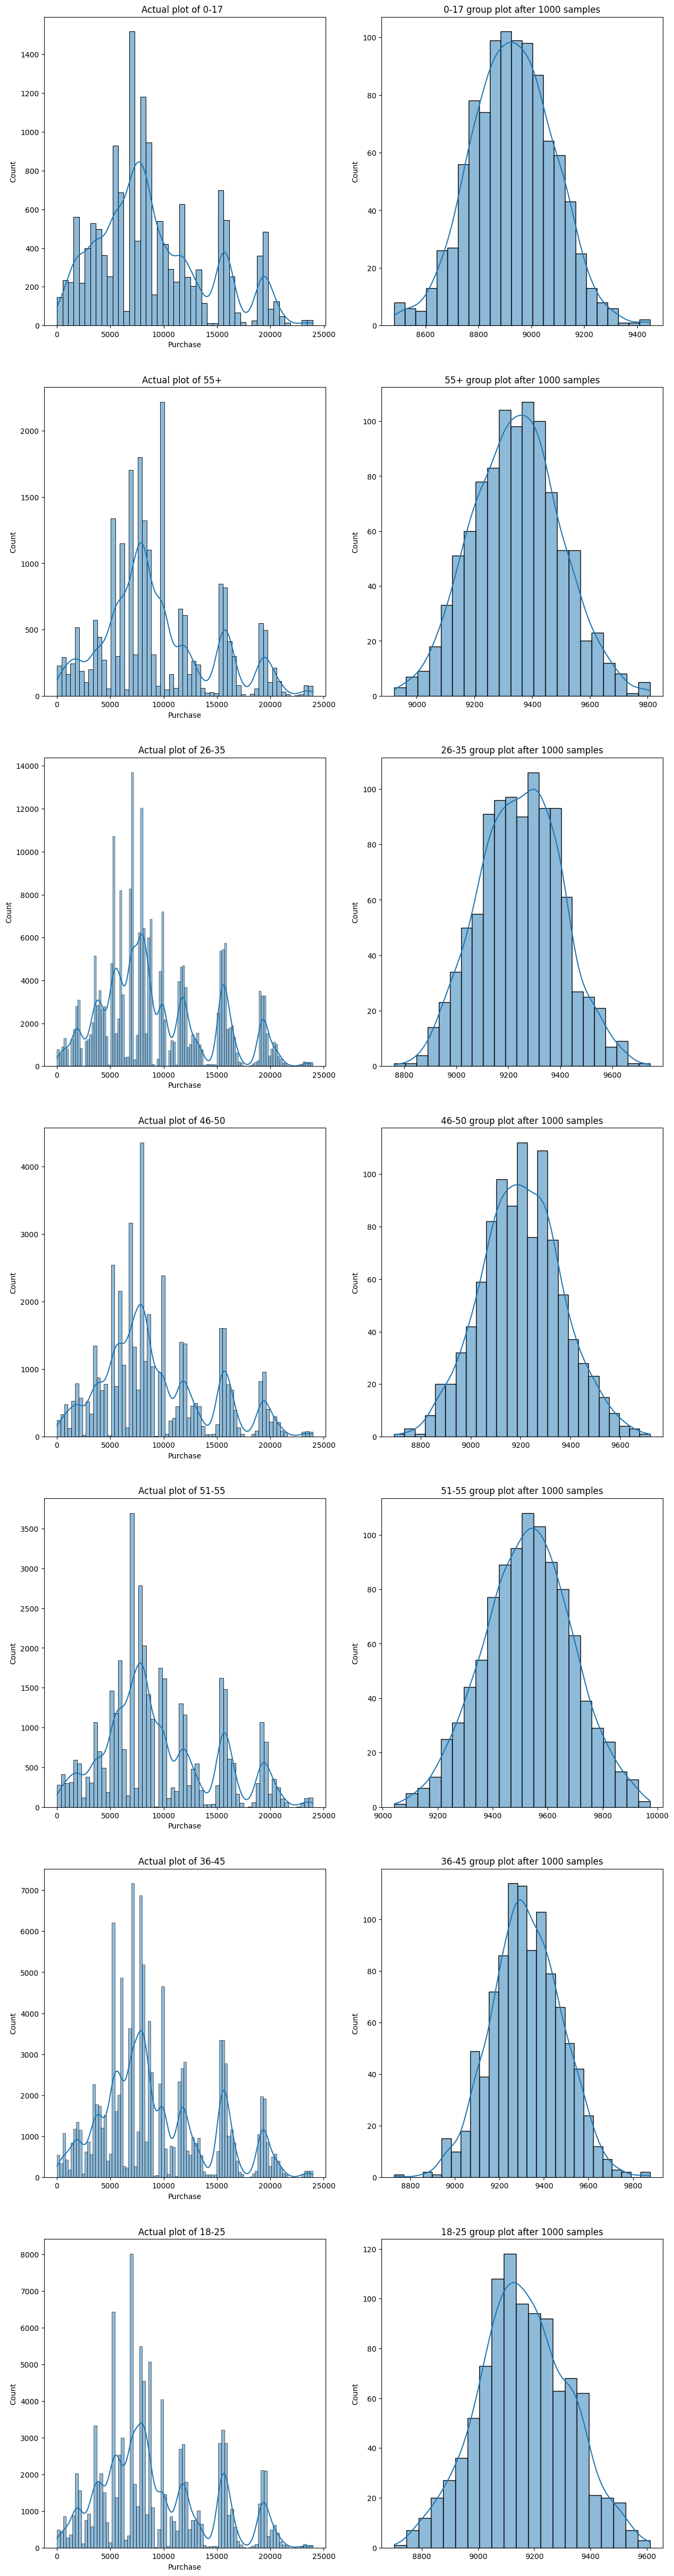

In [20]:
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 40))
fig.subplots_adjust(top=1.3)

ages = list(age_dict.keys())
count = 0
for row in range(7):
    temp = df[df['Age'] == ages[count]]['Purchase']
    sns.histplot(temp, kde=True, ax=axs[row, 0])
    axs[row, 0].set_title(f'Actual plot of {ages[count]}  ')
    sns.histplot(age_dict[ages[count]], kde=True, ax=axs[row, 1])
    axs[row, 1].set_title(f'{ages[count]} group plot after {samples} samples')
    count+=1
plt.show()

In [11]:
z_val = []

z_val.append(norm.ppf(0.90))
z_val.append(norm.ppf(0.95))
z_val.append(norm.ppf(0.997))

In [13]:
age_dict1 = {}

age_dict1['Group'] = []
age_dict1['Lower'] = []
age_dict1['Higher'] = []
age_dict1['CI'] = []

for i in age_dict.keys():
   avg = np.mean(age_dict[i])
   std = np.std(df[df['Age'] == i]['Purchase'])
   err = std/np.sqrt(samples)

   for j in z_val:
      val = interval(avg, j, err)
      age_dict1['Group'].append(i)
      age_dict1['Lower'].append(val[0])
      age_dict1['Higher'].append(val[1])
      age_dict1['CI'].append(norm.cdf(j)*100)
t1 = pd.DataFrame(age_dict1)

In [19]:
t1[t1['CI'] == 99.7]

,Group,Lower,Higher,CI
2,0-17,8709.75,9153.86,99.7
5,55+,9118.08,9553.53,99.7
8,26-35,9031.28,9466.65,99.7
11,46-50,9002.31,9433.92,99.7
14,51-55,9309.93,9751.98,99.7
17,36-45,9114.13,9550.59,99.7
20,18-25,8943.17,9380.62,99.7


In [100]:
avgamt_male = df[df['Gender']=='M']
avgamt_female = df[df['Gender']=='F']

#Finding the sample(sample size=1000) for avg purchase amount for males and females 
genders = ["M", "F"]

sample_size = 1000

num_repitions = 1000
male_means = []
female_means = []

for i in range(num_repitions):
    male_mean = avgamt_male.sample(sample_size, replace=True)['Purchase'].mean()
    female_mean = avgamt_female.sample(sample_size, replace=True)['Purchase'].mean()
    
    male_means.append(male_mean)
    female_means.append(female_mean)


In [102]:
np.mean(male_means)

9443.165825

In [ ]:
UnMarried = df[df['Age'] == 0]['Purchase']
Married = df[df['Age'] == 1]['Purchase']

sample = 1000

sampled_MMean = np.mean(np.array([np.mean(Married.sample(sample)) for _ in range(sample)]))
sampled_UMean = np.mean(np.array([np.mean(UnMarried.sample(sample)) for _ in range(sample)]))



MSTD = Married.std()
USTD = UnMarried.std()


M_err = MSTD/np.sqrt(sample)
U_err = USTD/np.sqrt(sample)

z90 = norm.ppf(0.90)
z95 = norm.ppf(0.95)
z99 = norm.ppf(0.997)

In [73]:
res = pd.crosstab(index=df['Gender'], columns=df['Product_Category'], values=df['Purchase'], aggfunc='sum')
res.fillna(0, inplace=True)
res

Product_Category,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
Gender,,,,,,,,,,,,,,,,,,,,
F,337631145,64543617,61637516,8933206,264658078,71104116,15460347,251682476,1100702,22882193,22161326,2179897,1072884,8564607,15371312,35264942,610477,1088168,16992,268641
M,1572382609,203972569,142447197,18447282,677177151,253046186,45436384,602636323,5269622,77955108,91629789,3151947,2935717,11450089,77597730,109855670,5268222,8202033,42386,676086


In [72]:
chi2, p_value, _, _ = chi2_contingency(res)
print(p_value, chi2)

0.0 81478998.45092781
